<h1><center>Traffic Sign Classification</center></h1>

In [8]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

<h1> Store data, labels in the list and  Preprocess the images

In [9]:
from PIL import Image
imgs_path = "/content/traffic_sign_dataset/Train"
data = []
labels = []
classes = 43

for i in range(43):
    p = os.path.join(imgs_path, str(i))
    for img in os.listdir(p):
        im = Image.open(p + '/' + img)
        im = im.resize((50,50))
        im = np.array(im)
        data.append(im)
        labels.append(i)

print("success")



success


<h4>Converting lists into numpy arrays

In [10]:
data = np.array(data)
labels = np.array(labels)

In [11]:
print(data.shape, labels.shape)

(39209, 50, 50, 3) (39209,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 50, 50, 3) (7842, 50, 50, 3) (31367,) (7842,)


<h4>Converting the labels into one hot encoding

In [14]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

<h4>Building the model

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [16]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 21, 21, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        36928     
                                                        

In [17]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 30s 21ms/step - loss: 2.2535 - accuracy: 0.4368 - val_loss: 0.3404 - val_accuracy: 0.9194
Epoch 2/20
981/981 [==============================] - 21s 21ms/step - loss: 0.5223 - accuracy: 0.8456 - val_loss: 0.1532 - val_accuracy: 0.9606
Epoch 3/20
981/981 [==============================] - 21s 22ms/step - loss: 0.3321 - accuracy: 0.9004 - val_loss: 0.0995 - val_accuracy: 0.9726
Epoch 4/20
981/981 [==============================] - 19s 20ms/step - loss: 0.2643 - accuracy: 0.9202 - val_loss: 0.0895 - val_accuracy: 0.9742
Epoch 5/20
981/981 [==============================] - 19s 20ms/step - loss: 0.2187 - accuracy: 0.9349 - val_loss: 0.0626 - val_accuracy: 0.9839
Epoch 6/20
981/981 [==============================] - 20s 21ms/step - loss: 0.1879 - accuracy: 0.9443 - val_loss: 0.0543 - val_accuracy: 0.9837
Epoch 7/20
981/981 [==============================] - 20s 21ms/step - loss: 0.1778 - accuracy: 0.9480 - val_loss: 0.0515 - val_accuracy:

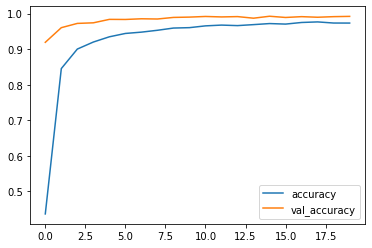

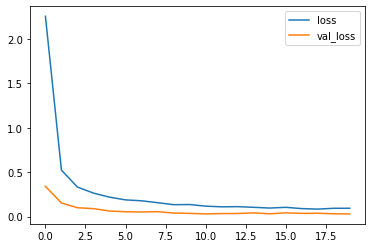

In [18]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

<h4>Testing on testing data

In [19]:
test = pd.read_csv("/content/traffic_sign_dataset/Test.csv")
print(test.shape)
test.head()

(12630, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [20]:
test_img_path = "/content/traffic_sign_dataset"
test_labels = test['ClassId'].values
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((50,50))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

(12630, 50, 50, 3)


In [21]:
test_labels = test['ClassId'].values
test_labels

array([16,  1, 38, ...,  6,  7, 10])

In [22]:
predictions = model.predict(test_data)
classes_x=np.argmax(predictions,axis=1)

In [23]:
classes_x

array([16,  1, 38, ...,  2,  7, 10])

In [24]:
predictions = np.argmax(model.predict(test_data), axis=-1)

In [25]:
predictions

array([16,  1, 38, ...,  2,  7, 10])

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.9612826603325416


In [27]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [35]:
from PIL import Image
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((50,50))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred1 = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred1

Predicted traffic sign is:  Speed limit (70km/h)


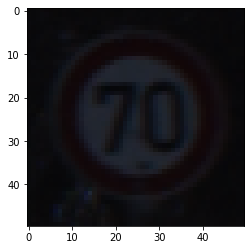

In [42]:
plot,prediction = test_on_img(r'/content/traffic_sign_dataset/Test/00544.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

<h3> Save Model

In [28]:
model.save("/content/traffic_sign_dataset/trafficclassfication.h5")

In [29]:
from keras.models import load_model
model1 = load_model('/content/traffic_sign_dataset/trafficclassfication.h5')

In [30]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [31]:
from PIL import Image
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((50,50))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model1.predict(X_test), axis=-1)
    return image,Y_pred

Predicted traffic sign is:  Keep right


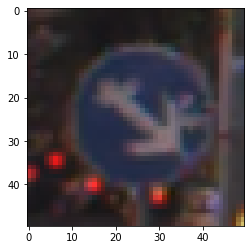

In [45]:
plot,prediction = test_on_img(r'/content/traffic_sign_dataset/Test/00554.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()